In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("fatalities_isr_pse_conflict_2000_to_2023.csv")
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [4]:
print(f'\033[94mNumber of records/rows & features/columns in the dataset are: {df.shape[0], df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

Number of records/rows & features/columns in the dataset are: (11124, 16)
Number of duplicate entries in the dataset are: 7
Number missing values in the dataset are: 7539


In [5]:
print(f'\033[94mNumber of records/rows & features/columns in the dataset are: {df.shape[0], df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')

Number of records/rows & features/columns in the dataset are: (11124, 16)
Number of duplicate entries in the dataset are: 7


In [6]:
## Now we will find out features that have null values
missing_val = df.isnull().sum()[df.isnull().sum() > 0]
print('missing values by feature')
print(missing_val)
missing_val_prc = missing_val / len(df)*100
print('missing values by feature, by % of total')
print(missing_val_prc)

missing values by feature
age                              129
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
notes                            280
dtype: int64
missing values by feature, by % of total
age                              1.159655
gender                           0.179791
took_part_in_the_hostilities    12.855088
place_of_residence               0.611291
place_of_residence_district      0.611291
type_of_injury                   2.615965
ammunition                      47.222222
notes                            2.517080
dtype: float64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

# 2. Important information

In [8]:
citizenship_counts = df['citizenship'].value_counts()
event_location_region = df['event_location_region'].value_counts()
hostilities_counts = df[df['took_part_in_the_hostilities'] == 'Yes']['citizenship'].value_counts()
no_hostilities_counts = df[df['took_part_in_the_hostilities'] == 'No']['citizenship'].value_counts()

# Number of events
num_events = len(df)

# Types of weapons used
weapons_used = df['ammunition'].value_counts()

# 3. Types of fires 

<AxesSubplot:>

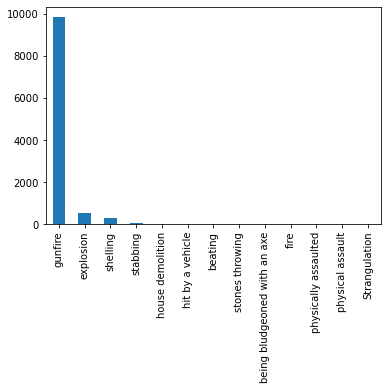

In [9]:
df['type_of_injury'].value_counts().plot(kind='bar')

# 4.Group data by 'gender'

<AxesSubplot:>

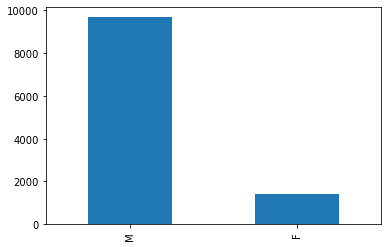

In [10]:
df['gender'].value_counts().plot(kind='bar')

# 5.Calculate summary statistics for 'age'

In [12]:
df.age.describe()

count    10995.000000
mean        26.745703
std         13.780548
min          1.000000
25%         19.000000
50%         23.000000
75%         31.000000
max        112.000000
Name: age, dtype: float64

# Group data by 'event_location_region' and count incidents

<AxesSubplot:>

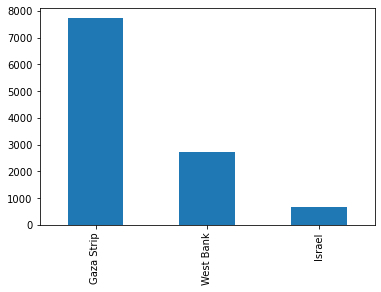

In [26]:
df['event_location_region'].value_counts().plot(kind='bar')

# Count unique values of 'place_of_residence' within each region

<AxesSubplot:ylabel='place_of_residence'>

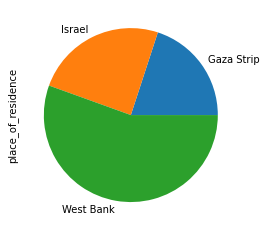

In [27]:
df.groupby('event_location_region')['place_of_residence'].nunique().plot(kind='pie')

# Calculate average age by 'event_location_region'

In [28]:
df.groupby('event_location_region')['age'].mean()

event_location_region
Gaza Strip    26.020224
Israel        36.286776
West Bank     26.421746
Name: age, dtype: float64

# Visualize the types of injuries using Matplotlib

<AxesSubplot:ylabel='type_of_injury'>

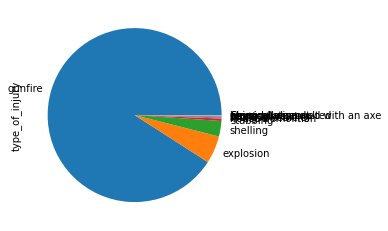

In [29]:
df['type_of_injury'].value_counts().plot(kind='pie')

# Grouping by 'citizenship' to find out how many incidents involve each nationality

In [30]:
# df.groupby('citizenship').size().reset_index(name='incident_count')
def nationality_incident(df):
    nationalityIncident = df.groupby('citizenship').size().reset_index(name='incident_count')
    return nationalityIncident
nationality_incident(df)

,citizenship,incident_count
0,American,1
1,Israeli,1029
2,Jordanian,2
3,Palestinian,10092


# Data filtering example: Incidents in a specific region with specific characteristics

In [31]:
df[(df['event_location_region']=='West Bank') & (df['type_of_injury']=='gunfire')]


,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11119,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.
11120,Farid Musa 'Issa a-Nesasreh,2000-10-17,28.0,Palestinian,Beit Furik,Nablus,West Bank,2000-10-17,M,Unknown,Beit Furik,Nablus,gunfire,NaN,Israeli civilians,Killed by a settler from Itamar while harvesti...
11121,Hillel Lieberman,2000-10-07,36.0,Israeli,Nablus,Nablus,West Bank,2000-10-07,M,Israelis,Elon Moreh,Nablus,gunfire,live ammunition,Palestinian civilians,His body was found a day after he disappeared.
11122,Fahed Mustafa 'Odeh Baker,2000-10-07,21.0,Palestinian,Bidya,Salfit,West Bank,2000-10-07,M,No,Bidya,Salfit,gunfire,NaN,Israeli civilians,Killed by settlers who rioted in Biddya village.


# Grouping by 'gender' to analyze how incidents vary between males and females

In [32]:
# df.groupby('gender').size().reset_index(name='incident_count')
df.groupby('gender').size().reset_index(name='incident_count')

,gender,incident_count
0,F,1423
1,M,9681


# Combining grouping and filtering (example: average age of males and females from a specific nationality involved in specific injuries)

In [33]:
df[(df['citizenship'] == 'Palestinian') & (df['type_of_injury'] == 'stones throwing')]

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
1016,'Aishah Muhammad Talal Rabi,2018-10-12,45.0,Palestinian,Rehelim,Nablus,West Bank,2018-10-12,F,NaN,Bidya,Salfit,stones throwing,NaN,Israeli civilians,Killed by a stone thrown from the direction of...
11110,Mustafa Mahmoud Musa 'Alian,2000-11-14,47.0,Palestinian,Kafr Malik,Ramallah and al-Bira,West Bank,2000-11-14,M,No,Askar R.C.,Nablus,stones throwing,NaN,Israeli civilians,Killed as a result of being hit in the chest b...


# Time-based analysis (grouping by year and month)

In [34]:
import seaborn as sns
# Time-based analysis (events at specific times)
df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['year'] = df['date_of_event'].dt.year
df['month'] = df['date_of_event'].dt.month_name()  # Format month as month name
time_events = df.groupby(['year', 'month']).size().reset_index(name='incident_count')
time_events['year_month'] = time_events['month'] + ' ' + time_events['year'].astype(str)
time_events

,year,month,incident_count,year_month
0,2000,December,10,December 2000
1,2000,November,17,November 2000
2,2000,October,8,October 2000
3,2001,April,4,April 2001
4,2001,August,26,August 2001
...,...,...,...,...
262,2023,July,25,July 2023
263,2023,June,24,June 2023
264,2023,March,25,March 2023
265,2023,May,53,May 2023


# Grouping and Pivot Tables:

<AxesSubplot:xlabel='citizenship'>

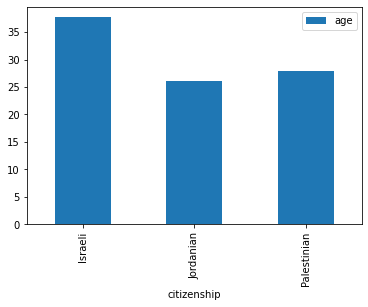

In [35]:
# Calculate average age for female (F) citizens
female_age = pd.pivot_table(df[df['gender'] == 'F'], values='age', index=['citizenship'], aggfunc='mean')
female_age.plot(kind='bar')

<AxesSubplot:xlabel='citizenship'>

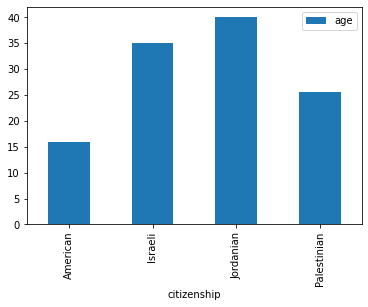

In [36]:
# Calculate average age for male (M) citizens
male_age = pd.pivot_table(df[df['gender'] == 'M'], values='age', index=['citizenship'], aggfunc='mean')
male_age.plot(kind='bar')

# Filtering with Multiple Conditions:

In [39]:
df[(df['citizenship'] == 'Palestinian') & (df['gender'] == 'F') & (df['type_of_injury'])]

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes,year,month
73,Sadil Ghassan Ibrahim Naghnaghiyah,2023-06-19,14.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-06-21,F,NaN,Jenin R.C.,Jenin,gunfire,live ammunition,Israeli security forces,Wounded in the head by Israeli forces when fil...,2023,June
114,Iman 'Alaa 'Ata 'Adas,2023-05-09,17.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-05-09,F,No,Gaza city,Gaza,gunfire,missile,Israeli security forces,"Killed together with her sister in their home,...",2023,May
121,Mirvat Saleh Muhammad Khaswan,2023-05-09,44.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-05-09,F,No,Gaza city,Gaza,gunfire,missile,Israeli security forces,Killed together with her husband and son when ...,2023,May
122,Mayar Tareq Muhammad 'Iz a-Din,2023-05-09,10.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-05-09,F,No,Gaza city,Gaza,gunfire,missile,Israeli security forces,"Killed together with her brother, a minor, and...",2023,May
124,Hajar Khalil Salah al-Bahtini,2023-05-09,4.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-05-09,F,No,Gaza city,Gaza,gunfire,missile,Israeli security forces,"Killed together with her mother and father, a ...",2023,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10923,Raedah 'Eashah,2001-10-21,18.0,Palestinian,Jenin,Jenin,West Bank,2001-10-21,F,No,Sanur,Jenin,gunfire,NaN,Israeli security forces,Killed while harvesting olives.,2001,October
10928,Rania Elias Nasri Kharuf,2001-10-20,22.0,Palestinian,Beit Jala,Bethlehem,West Bank,2001-10-20,F,No,Beit Jala,Bethlehem,gunfire,NaN,Israeli security forces,Killed while shopping.,2001,October
10937,'Aishah Mahmoud 'Abd al-Fatah 'Odeh,2001-10-20,39.0,Palestinian,'Aydah R.C.,Bethlehem,West Bank,2001-10-20,F,No,'Aydah R.C.,Bethlehem,gunfire,NaN,Israeli security forces,Killed while in her home.,2001,October
10939,Maryam Suliman 'Othman Sbieh,2001-10-19,36.0,Palestinian,al-Khader,Bethlehem,West Bank,2001-10-19,F,No,al-Khader,Bethlehem,gunfire,NaN,Israeli security forces,"Killed while in the street, trying to flee fro...",2001,October
